In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt

# get path structure:
here = os.getcwd()
camb_dir = os.path.join(here, 'CAMB')
print(here)
print(camb_dir)

# insert camb directory to path
sys.path.insert(0, camb_dir)

import camb
print('camb version:', camb.__version__)
print('camb path:', camb.__path__)

/home/elena/astrocosmolib/Lessons/Camb_demo
/home/elena/astrocosmolib/Lessons/Camb_demo/CAMB
camb version: 1.5.9
camb path: ['/home/elena/anaconda3/envs/acc-env/lib/python3.12/site-packages/camb']


In [2]:
# initialization:
pars = camb.set_params(
                       H0=67.5,   # H0
                       ombh2=0.022, # Omega_b * h^2
                       omch2=0.122,  # Omega_c * h^2
                       mnu=0.06, # Sum of neutrino masses in eV
                       omk=0, # Omega K
                       tau=0.06,  # reionization optical depth
                       As=2e-9, # scalar amplitude
                       ns=0.965, # scalar spectral index
                       )

In [3]:
pars #stampa tutti i parametri che posso inizializzare

class: <CAMBparams>
 WantCls = True
 WantTransfer = False
 WantScalars = True
 WantTensors = False
 WantVectors = False
 WantDerivedParameters = True
 Want_cl_2D_array = True
 Want_CMB = True
 Want_CMB_lensing = True
 DoLensing = True
 NonLinear = NonLinear_none
 Transfer: <TransferParams>
   high_precision = False
   accurate_massive_neutrinos = False
   kmax = 0.9
   k_per_logint = 0
   PK_num_redshifts = 1
   PK_redshifts = [0.0]
 want_zstar = False
 want_zdrag = False
 min_l = 2
 max_l = 2500
 max_l_tensor = 600
 max_eta_k = 5000.0
 max_eta_k_tensor = 1200.0
 ombh2 = 0.022
 omch2 = 0.122
 omk = 0.0
 omnuh2 = 0.000644866570625114
 H0 = 67.5
 TCMB = 2.7255
 YHe = 0.24569492503497048
 num_nu_massless = 2.0293333333333337
 num_nu_massive = 1
 nu_mass_eigenstates = 1
 share_delta_neff = False
 nu_mass_degeneracies = [1.0146666666666666]
 nu_mass_fractions = [1.0]
 nu_mass_numbers = [1]
 InitPower: <InitialPowerLaw>
   tensor_parameterization = tensor_param_rpivot
   ns = 0.965
   nrun =

## Background:

In [4]:
# compute background cosmology:
results = camb.get_background(pars)

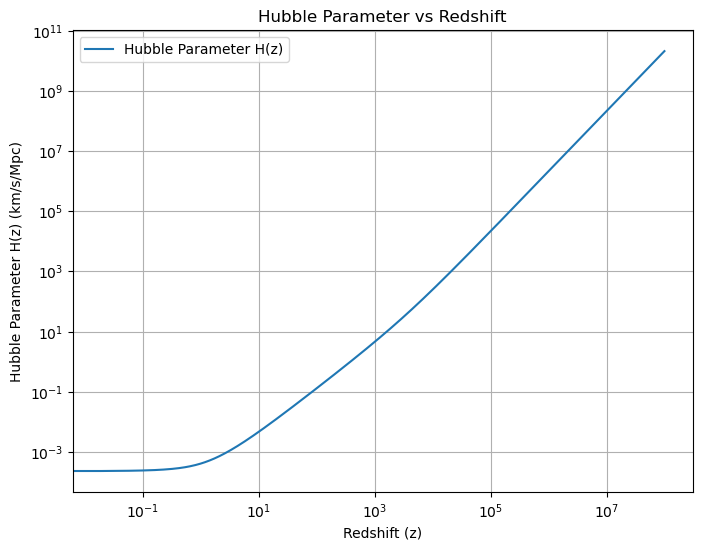

In [5]:
a = np.logspace(-8, 0, 1000) # scale factor
z = 1.0/a - 1.0
h_of_z = results.h_of_z(z)

# plot:
plt.figure(figsize=(8, 6))
plt.plot(z, h_of_z, label='Hubble Parameter H(z)')
plt.xlabel('Redshift (z)')
plt.ylabel('Hubble Parameter H(z) (km/s/Mpc)')
plt.title('Hubble Parameter vs Redshift')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

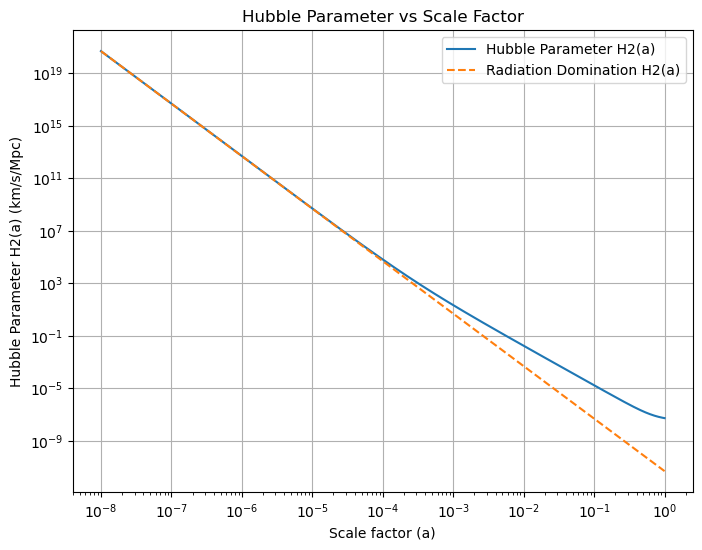

In [6]:
a = np.logspace(-8, 0, 1000) # scale factor
z = 1.0/a - 1.0
h_of_z = results.h_of_z(z)

# radiation domination power law:
_radiation_dom_H2 = (a/a[0])**(-4)*h_of_z[0]**2

# plot:
plt.figure(figsize=(8, 6))
plt.plot(a, h_of_z**2, label='Hubble Parameter H2(a)')
plt.plot(a, _radiation_dom_H2, label='Radiation Domination H2(a)', linestyle='--')
plt.xlabel('Scale factor (a)')
plt.ylabel('Hubble Parameter H2(a) (km/s/Mpc)')
plt.title('Hubble Parameter vs Scale Factor')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

## Thermal history:

In [7]:
a = np.logspace(-8, 0, 1000) # scale factor
z = 1.0/a - 1.0
# get thermo evolution:
thermo_results = results.get_background_redshift_evolution(z, vars=['x_e', 'opacity', 'visibility', 'cs2b', 'T_b', 'dopacity', 'ddopacity', 'dvisibility', 'ddvisibility'], format='dict')

In [8]:
thermo_results.keys()

dict_keys(['x_e', 'opacity', 'visibility', 'cs2b', 'T_b', 'dopacity', 'ddopacity', 'dvisibility', 'ddvisibility'])

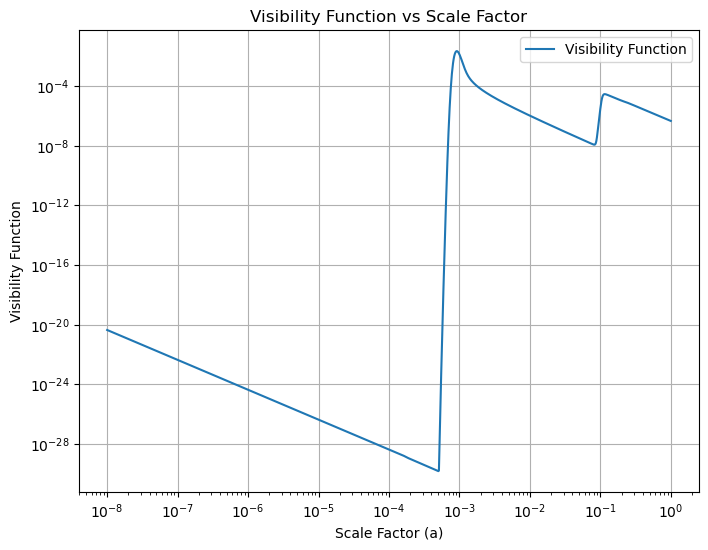

In [9]:
# Plot visibility function as a function of scale factor a
plt.figure(figsize=(8, 6))
plt.plot(a, thermo_results['visibility'], label='Visibility Function')
plt.xlabel('Scale Factor (a)')
plt.ylabel('Visibility Function')
plt.title('Visibility Function vs Scale Factor')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

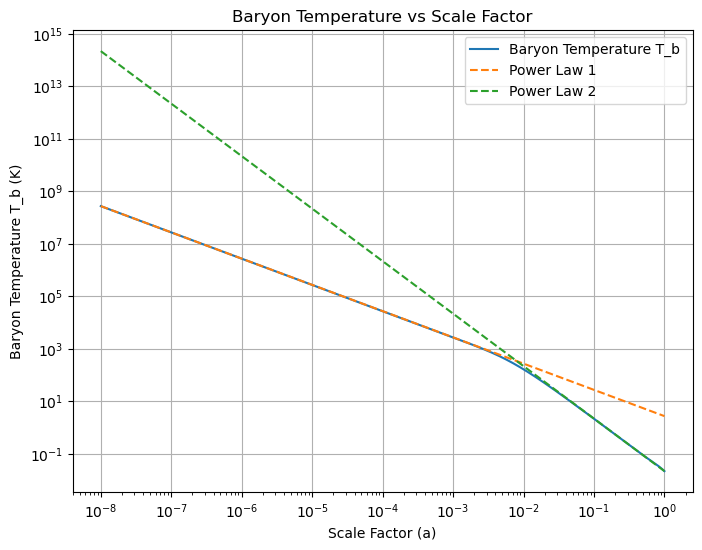

In [10]:
# get the two power laws:
_power_1 = (a/a[0])**(-1)*thermo_results['T_b'][0]
_power_2 = (a/a[-1])**(-2)*thermo_results['T_b'][-1]

# Plot baryon temperature as a function of scale factor a
plt.figure(figsize=(8, 6))
plt.plot(a, thermo_results['T_b'], label='Baryon Temperature T_b')
plt.plot(a, _power_1, label='Power Law 1', linestyle='--')
plt.plot(a, _power_2, label='Power Law 2', linestyle='--')
plt.xlabel('Scale Factor (a)')
plt.ylabel('Baryon Temperature T_b (K)')
plt.title('Baryon Temperature vs Scale Factor')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

## Perturbations:

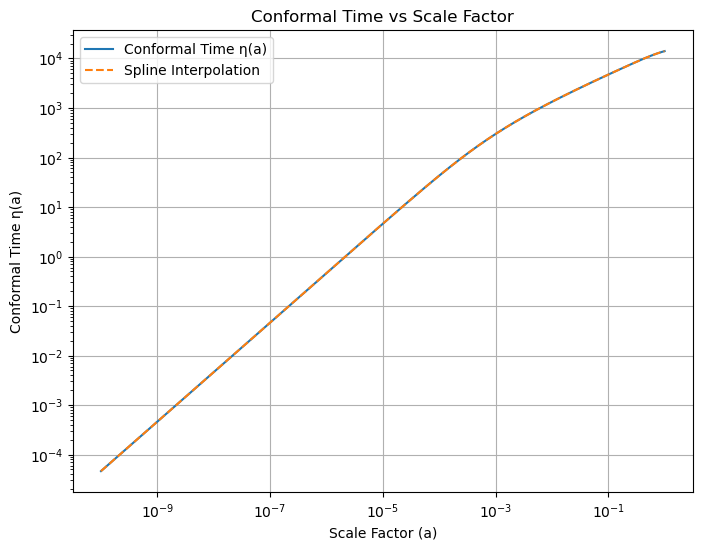

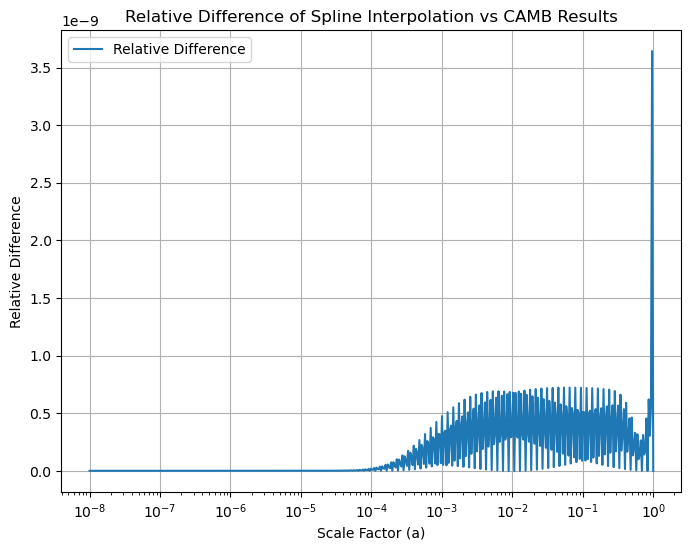

In [11]:
from scipy.interpolate import interp1d

# calculate a, z and eta:
a = np.logspace(-10, 0, 1000)
z = 1.0/a - 1.0
eta = results.conformal_time(z)

# Spline interpolation of eta as a function of a
eta_of_a = interp1d(a, eta, kind='cubic', fill_value="extrapolate")

# plot a vs eta:
plt.figure(figsize=(8, 6))
plt.plot(a, eta, label='Conformal Time η(a)')
plt.plot(a, eta_of_a(a), label='Spline Interpolation', linestyle='--')
plt.xlabel('Scale Factor (a)')
plt.ylabel('Conformal Time η(a)')
plt.title('Conformal Time vs Scale Factor')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

# Define a sub-grid for scale factor
a_sub = np.logspace(-8, 0, 500)
eta_sub = results.conformal_time(1.0 / a_sub - 1.0)

# Calculate relative difference
relative_difference = (eta_of_a(a_sub) - eta_sub) / eta_sub

# Plot relative difference
plt.figure(figsize=(8, 6))
plt.plot(a_sub, relative_difference, label='Relative Difference')
plt.xlabel('Scale Factor (a)')
plt.ylabel('Relative Difference')
plt.title('Relative Difference of Spline Interpolation vs CAMB Results')
plt.xscale('log')
plt.grid()
plt.legend()
plt.show()

In [12]:
a = np.logspace(-8, 0, 1000) # scale factor
k = [1.e-3, 0.1, 1.0] # wavenumbers in 1/Mpc
ev = results.get_time_evolution(k, eta_of_a(a))
variables = camb.model.evolve_names
for i in range(0, len(variables)):
    print(", ".join(variables[i:i+4]))

k/h, delta_cdm, delta_baryon, delta_photon
delta_cdm, delta_baryon, delta_photon, delta_neutrino
delta_baryon, delta_photon, delta_neutrino, delta_nu
delta_photon, delta_neutrino, delta_nu, delta_tot
delta_neutrino, delta_nu, delta_tot, delta_nonu
delta_nu, delta_tot, delta_nonu, delta_tot_de
delta_tot, delta_nonu, delta_tot_de, Weyl
delta_nonu, delta_tot_de, Weyl, v_newtonian_cdm
delta_tot_de, Weyl, v_newtonian_cdm, v_newtonian_baryon
Weyl, v_newtonian_cdm, v_newtonian_baryon, v_baryon_cdm
v_newtonian_cdm, v_newtonian_baryon, v_baryon_cdm, a
v_newtonian_baryon, v_baryon_cdm, a, etak
v_baryon_cdm, a, etak, H
a, etak, H, growth
etak, H, growth, v_photon
H, growth, v_photon, pi_photon
growth, v_photon, pi_photon, E_2
v_photon, pi_photon, E_2, v_neutrino
pi_photon, E_2, v_neutrino, T_source
E_2, v_neutrino, T_source, E_source
v_neutrino, T_source, E_source, lens_potential_source
T_source, E_source, lens_potential_source
E_source, lens_potential_source
lens_potential_source


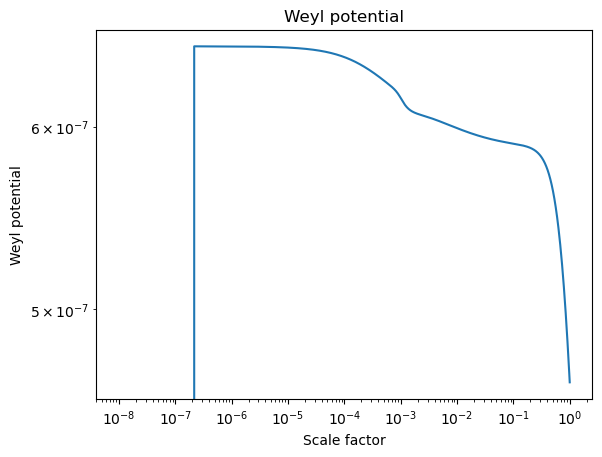

In [13]:
weyl_potential = ev[0, :, variables.index('Weyl')]
plt.plot(a, np.abs(weyl_potential))
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Scale factor')
plt.ylabel('Weyl potential')
plt.title('Weyl potential')
plt.show()

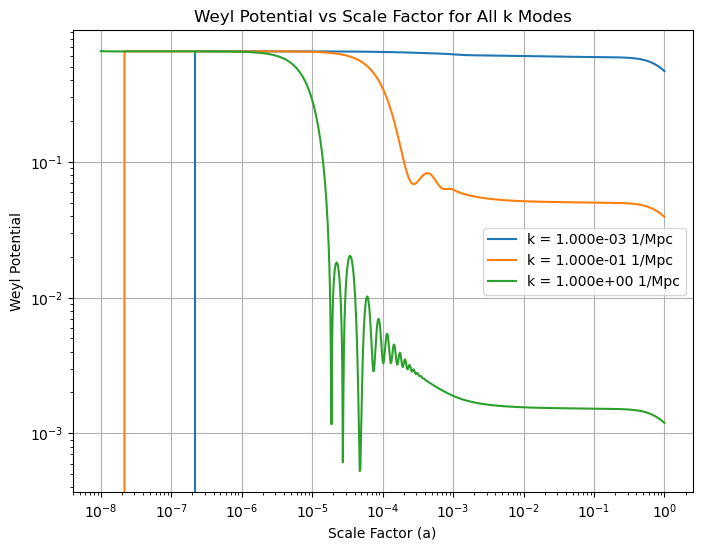

In [14]:
# Plot Weyl potential for all k modes
plt.figure(figsize=(8, 6))
for i, k_mode in enumerate(k):
    weyl_potential = ev[i, :, variables.index('Weyl')]
    plt.plot(a, np.abs(weyl_potential) / k_mode**2, label=f'k = {k_mode:.3e} 1/Mpc')

plt.xlabel('Scale Factor (a)')
plt.ylabel('Weyl Potential')
plt.title('Weyl Potential vs Scale Factor for All k Modes')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

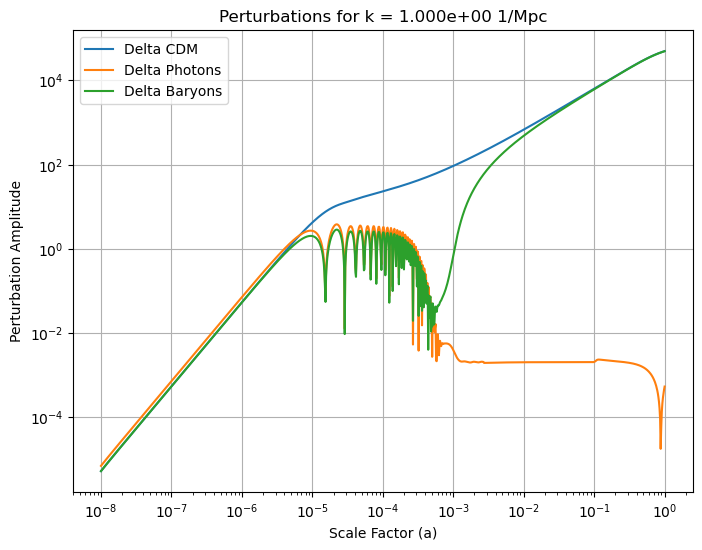

In [15]:
# Select a specific k mode (e.g., the first one)
k_mode_index = 2

# Extract the variables for the selected k mode
delta_cdm = ev[k_mode_index, :, variables.index('delta_cdm')]
delta_photons = ev[k_mode_index, :, variables.index('delta_photon')]
delta_baryons = ev[k_mode_index, :, variables.index('delta_baryon')]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(a, np.abs(delta_cdm), label='Delta CDM')
plt.plot(a, np.abs(delta_photons), label='Delta Photons')
plt.plot(a, np.abs(delta_baryons), label='Delta Baryons')
plt.xlabel('Scale Factor (a)')
plt.ylabel('Perturbation Amplitude')
plt.title(f'Perturbations for k = {k[k_mode_index]:.3e} 1/Mpc')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.grid()
plt.show()

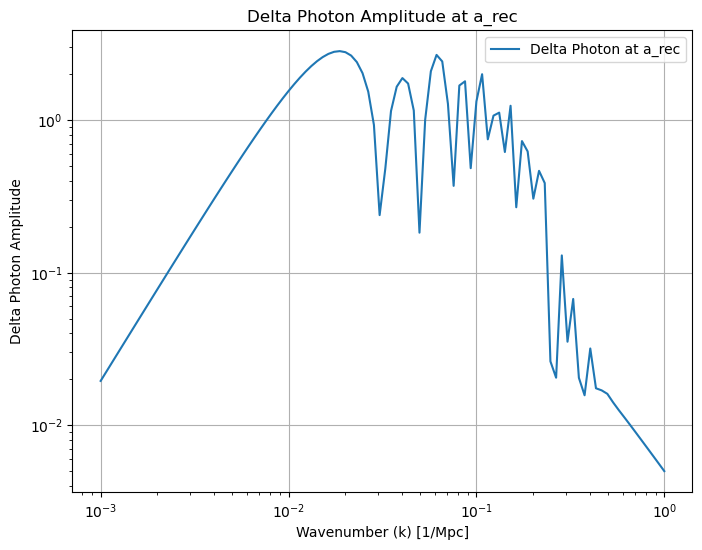

In [34]:
z_rec = results.get_derived_params()['zstar']
a_rec = 1.0 / (1.0 + z_rec)
a = [a_rec, 1.0]
k = np.logspace(-3, 0, 100)
ev = results.get_time_evolution(k, eta_of_a(a))
variables = camb.model.evolve_names

# Extract photon density perturbation at a_rec for all k
delta_photon_at_arec = ev[:, 0, variables.index('delta_photon')]

# Plot the results
plt.figure(figsize=(8, 6))
plt.plot(k, np.abs(delta_photon_at_arec), label='Delta Photon at a_rec')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Wavenumber (k) [1/Mpc]')
plt.ylabel('Delta Photon Amplitude')
plt.title('Delta Photon Amplitude at a_rec')
plt.grid()
plt.legend()
plt.show()

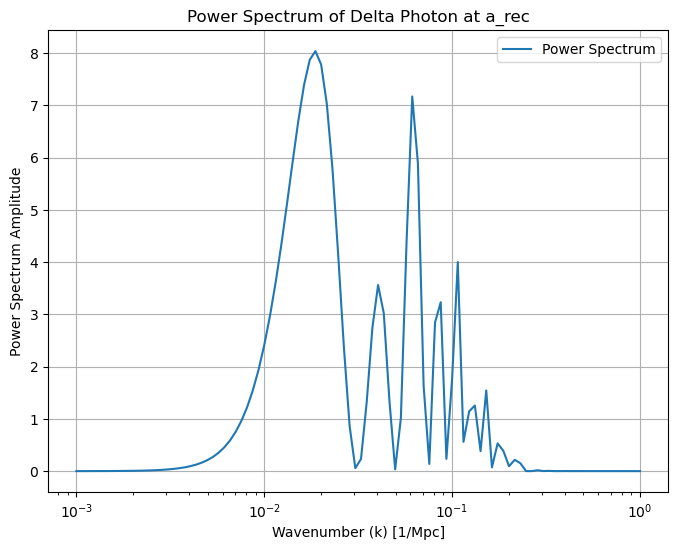

In [32]:
#plot power spectrum
import camb.symbolic as cs
Delta_gamma = cs.make_frame_invariant(cs.Delta_g, 'Newtonian')
variables_2 = [Delta_gamma, cs.Psi_N]

zrec = results.get_derived_params()['zstar']
a_rec = 1.0 / (1.0 + zrec)
k = np.logspace(-3, 0, 100)    
ev = results.get_time_evolution(k, eta_of_a(a_rec))
ev_2 = results.get_time_evolution(k, eta_of_a(a_rec), variables_2)
variables_2 = camb.model.evolve_names

plt.figure(figsize=(8, 6))
plt.plot(k, np.abs(delta_photon_at_arec)**2, label='Power Spectrum')
plt.xscale('log')
plt.xlabel('Wavenumber (k) [1/Mpc]')
plt.ylabel('Power Spectrum Amplitude')
plt.title('Power Spectrum of Delta Photon at a_rec')
plt.grid()
plt.legend()
plt.show()

In [18]:
#scala lineare sulle y
psi = ev[:, 0, 1]

delta_ToT = delta_photons/4. +psi

ValueError: operands could not be broadcast together with shapes (1000,) (100,) 

In [30]:
#TERMINE DOPPLER
vb_newtonian = ev[:, 0, variables.index('v_baryon')]
variables_2 = [Delta_gamma, cs.Psi_N, vb_newtonian]
ev_2 = results.get_time_evolution(k, eta_of_a(a_rec), variables_2)
delta_ToT = delta_photons/4. + ev_2[:, 0, 1] + ev_2[:, 0, 2] 
plt.figure(figsize=(8, 6))
plt.plot(k, np.abs(delta_ToT)**2, label='Power Spectrum with Doppler Term')
plt.xscale('log')
plt.xlabel('Wavenumber (k) [1/Mpc]')
plt.ylabel('Power Spectrum Amplitude')
plt.title('Power Spectrum of Delta Photon at a_rec with Doppler Term')
plt.grid()
plt.legend()
plt.show()

ValueError: 'v_baryon' is not in list

## Observables:

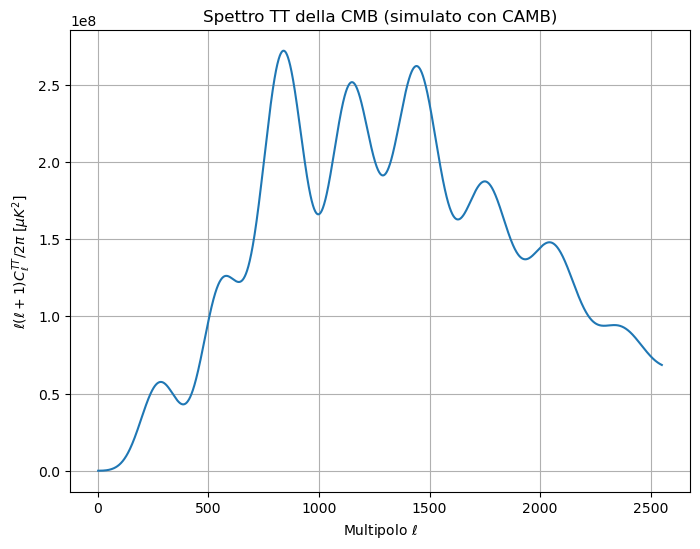

In [35]:
import camb
from camb import model, initialpower
import matplotlib.pyplot as plt
import numpy as np

# Parametri cosmologici standard (Planck 2018-like)
H0 = 67.5            # Hubble parameter
ombh2 = 0.022        # Densità barionica
omch2 = 0.122        # Densità di materia oscura
As = 2.1e-9          # Ampiezza delle fluttuazioni primordiali
ns = 0.965           # Indice spettrale
tau = 0.06           # Profondità ottica alla ricombinazione

# Imposta i parametri di CAMB
pars = camb.CAMBparams()
pars.set_cosmology(H0=H0, ombh2=ombh2, omch2=omch2, mnu=0.06, omk=0, tau=tau)
pars.InitPower.set_params(As=As, ns=ns)
pars.set_for_lmax(2500, lens_potential_accuracy=0)

# Esegui CAMB
results = camb.get_results(pars)

# Ottieni lo spettro C_ell
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

# Estrai TT spectrum
totCL = powers['total']
ells = np.arange(totCL.shape[0])
cl_tt = totCL[:, 0]

# Plotta lo spettro
plt.figure(figsize=(8,6))
plt.plot(ells[2:], cl_tt[2:] * ells[2:] * (ells[2:] + 1) / (2 * np.pi))
plt.xlabel(r'Multipolo $\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell^{TT}/2\pi\ [\mu K^2]$')
plt.title('Spettro TT della CMB (simulato con CAMB)')
plt.grid()
plt.show()
